In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
loan_data = pd.read_csv('loan_data.csv')
print(loan_data)

       person_age person_gender person_education  person_income  \
0            22.0        female           Master        71948.0   
1            21.0        female      High School        12282.0   
2            25.0        female      High School        12438.0   
3            23.0        female         Bachelor        79753.0   
4            24.0          male           Master        66135.0   
...           ...           ...              ...            ...   
44995        27.0          male        Associate        47971.0   
44996        37.0        female        Associate        65800.0   
44997        33.0          male        Associate        56942.0   
44998        29.0          male         Bachelor        33164.0   
44999        24.0          male      High School        51609.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT    35000.0           PERSONAL   
1                   0                   O

In [6]:
loan_data.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [7]:
categorical_columns = ['person_gender', 'person_education', 'person_home_ownership','loan_intent', 'previous_loan_defaults_on_file']
loan_data_encoded = pd.get_dummies(loan_data, columns=categorical_columns, drop_first=True)
print(loan_data_encoded)

       person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0            22.0        71948.0               0    35000.0          16.02   
1            21.0        12282.0               0     1000.0          11.14   
2            25.0        12438.0               3     5500.0          12.87   
3            23.0        79753.0               0    35000.0          15.23   
4            24.0        66135.0               1    35000.0          14.27   
...           ...            ...             ...        ...            ...   
44995        27.0        47971.0               6    15000.0          15.66   
44996        37.0        65800.0              17     9000.0          14.07   
44997        33.0        56942.0               7     2771.0          10.02   
44998        29.0        33164.0               4    12000.0          13.23   
44999        24.0        51609.0               1     6665.0          17.05   

       loan_percent_income  cb_person_cred_hist_length  credit_

In [10]:
from sklearn.model_selection import train_test_split

X = loan_data_encoded.drop(columns=['loan_status'])
y = loan_data_encoded['loan_status']

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaler = sc.fit_transform(X_train)
X_test_scaler = sc.transform(X_test)

In [16]:
print(X_train_scaler)

[[ 1.03947529  0.19422493  0.93118562 ...  2.22938316 -0.45732836
  -1.01415574]
 [-0.4561859  -0.089962   -0.39501412 ... -0.44855457  2.1866127
   0.98604185]
 [ 2.20276733  2.82816736  2.0916104  ...  2.22938316 -0.45732836
   0.98604185]
 ...
 [ 0.87329072 -0.26104458  0.59963569 ... -0.44855457  2.1866127
   0.98604185]
 [-0.29000132  1.14498636  0.10231078 ... -0.44855457 -0.45732836
  -1.01415574]
 [-0.29000132  1.52245281 -0.22923915 ...  2.22938316 -0.45732836
   0.98604185]]


In [17]:
print(X_test_scaler)

[[ 0.70710614  0.18954926  0.76541066 ... -0.44855457 -0.45732836
  -1.01415574]
 [-0.62237047 -0.27833286  0.10231078 ... -0.44855457 -0.45732836
   0.98604185]
 [-0.95473963 -0.5067391  -0.89233902 ... -0.44855457 -0.45732836
  -1.01415574]
 ...
 [-0.62237047 -0.01986209 -0.72656406 ... -0.44855457 -0.45732836
  -1.01415574]
 [ 1.7042136  -0.50856261  1.76006046 ... -0.44855457 -0.45732836
  -1.01415574]
 [-0.4561859  -0.53107593 -0.89233902 ... -0.44855457 -0.45732836
  -1.01415574]]


In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_scaler,y_train)

LogisticRegression(random_state=0)

In [19]:
y_pred = classifier.predict(X_test_scaler)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cm = confusion_matrix(y_test,y_pred)
print(cm)

ac =accuracy_score(y_test,y_pred)
print(ac)

class_report = classification_report(y_test, y_pred)
print(class_report)

[[6557  433]
 [ 517 1493]]
0.8944444444444445
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6990
           1       0.78      0.74      0.76      2010

    accuracy                           0.89      9000
   macro avg       0.85      0.84      0.85      9000
weighted avg       0.89      0.89      0.89      9000



In [26]:
import seaborn as sns

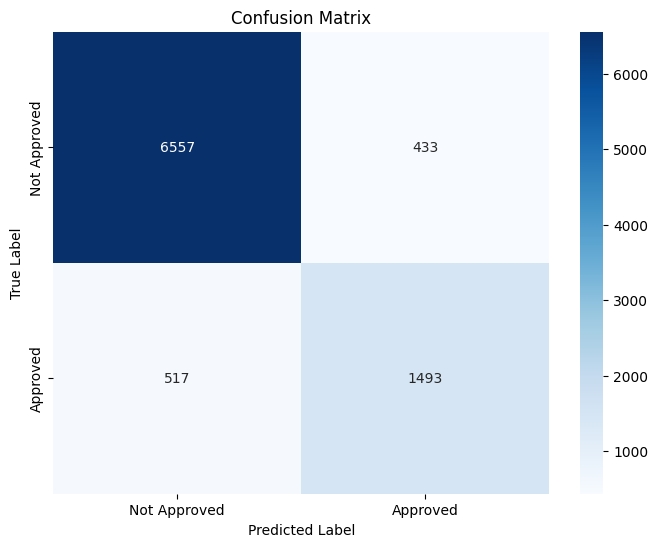

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

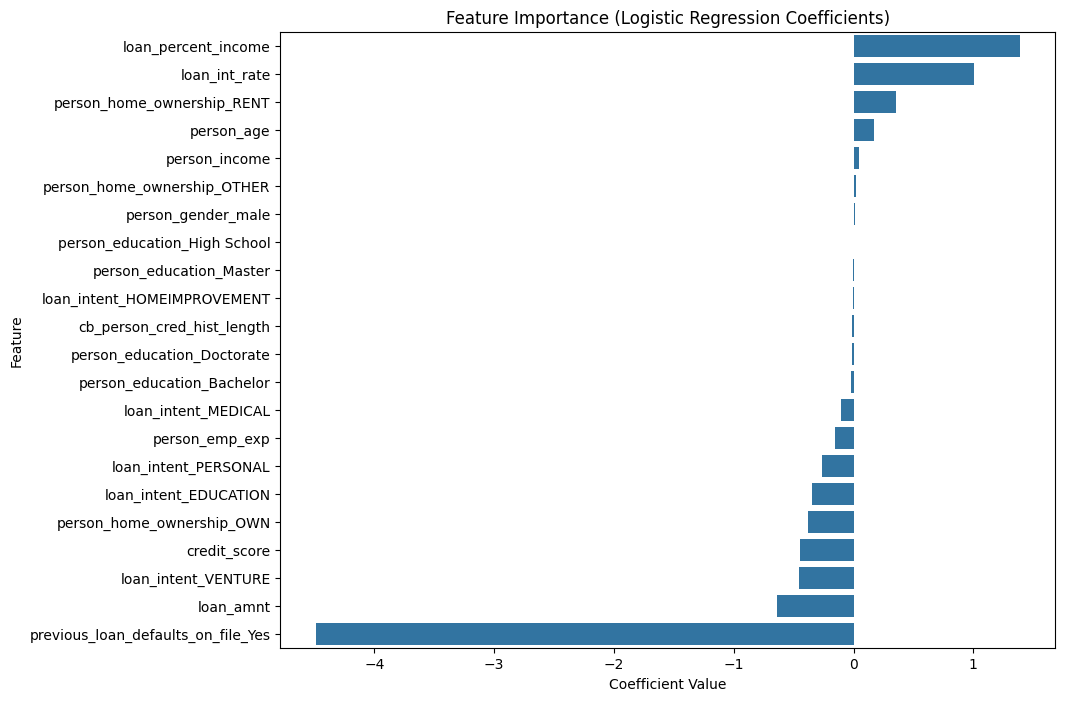

In [28]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": classifier.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x="Coefficient", y="Feature", data=coefficients)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

In [30]:
comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

# Calculate the difference
comparison["Difference"] = comparison["Actual"] - comparison["Predicted"]

print(comparison.head())

matches = (comparison["Actual"] == comparison["Predicted"]).sum()
mismatches = (comparison["Actual"] != comparison["Predicted"]).sum()

print(f"Exact Matches: {matches}")
print(f"Mismatches: {mismatches}")

       Actual  Predicted  Difference
37979       0          0           0
9911        0          0           0
43386       1          1           0
13822       0          0           0
44810       1          1           0
Exact Matches: 8050
Mismatches: 950


In [31]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# Compute probabilities for the positive class (1)
y_probs = classifier.predict_proba(X_test_scaler)[:, 1]

# ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

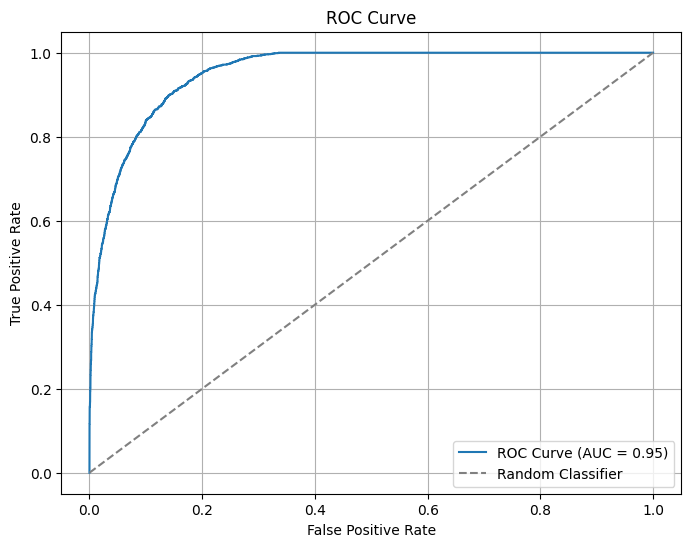

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

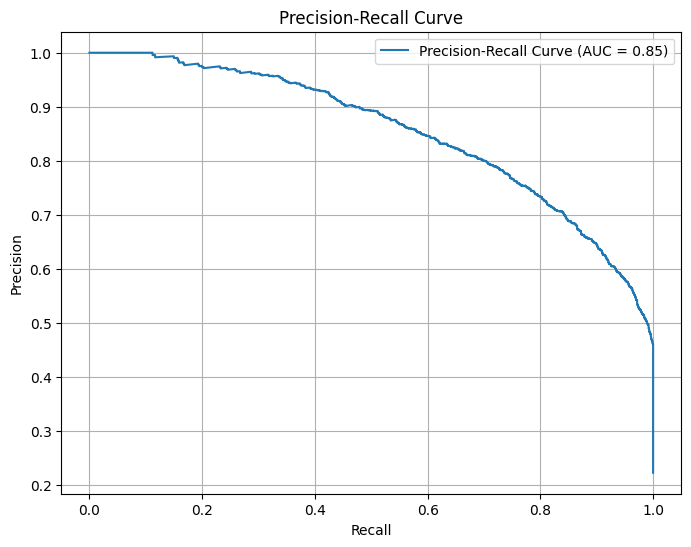

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Precision-Recall Curve (AUC = {pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()

In [34]:
fscore = (2 * precision * recall) / (precision + recall + 1e-8)
optimal_idx_pr = fscore.argmax()
optimal_threshold_pr = pr_thresholds[optimal_idx_pr]

print(optimal_threshold_pr)

0.3578859484763344
